## HCP Behavial Data 

In this XP I'll will explore HCP data from different domaine  :
- Demographic
- Physiologic
- Cognitive
- Emotional/Social
- Motor
- Sensory


In [49]:
import os
import numpy as np
import scipy
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio

In [32]:
## run only once on a new machine
#import plotly 
#plotly.tools.set_credentials_file(username='yassineBHA', api_key='lwskfl48jk')


In [117]:
# plotly setup
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly import figure_factory as FF
init_notebook_mode(connected=True)

In [2]:
%matplotlib inline
sns.set(color_codes=True)

In [3]:
# Load pheno file
path_root = '/home/yassinebha/Drive/HCP/'
data = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))

# Demographic Domain

In [41]:
behav_demog = ["Age_in_Yrs","Gender","Handedness","Zygosity","Race","Ethnicity","SSAGA_Income","SSAGA_Educ"]
data_demog = data.get(behav_demog)
data_demog.describe()

,Age_in_Yrs,Handedness,SSAGA_Income,SSAGA_Educ
count,970.000000,970.000000,965.000000,969.000000
mean,28.816495,65.082474,4.940933,14.823529
std,3.659859,45.494569,2.175313,1.839877
min,22.000000,-100.000000,1.000000,11.000000
25%,26.000000,60.000000,3.000000,13.000000
50%,29.000000,80.000000,5.000000,16.000000
75%,32.000000,95.000000,7.000000,16.000000
max,37.000000,100.000000,8.000000,17.000000


In [5]:
data_demog.Zygosity.value_counts()

NotTwin    494
NotMZ      250
MZ         225
Name: Zygosity, dtype: int64

In [6]:
data_demog.Ethnicity.value_counts()

Not Hispanic/Latino        884
Hispanic/Latino             78
Unknown or Not Reported      8
Name: Ethnicity, dtype: int64

In [7]:
data_demog.Race.value_counts()

White                                   702
Black or African Am.                    178
Asian/Nat. Hawaiian/Othr Pacific Is.     48
More than one                            22
Unknown or Not Reported                  18
Am. Indian/Alaskan Nat.                   2
Name: Race, dtype: int64

In [8]:
# Replace cathegorical variable with numeric value
# Gender -->'M':1,'F':2
# Zygosity --> 'NotTwin':0, 'NotMZ':1, 'MZ':2
# Ethnicity --> 'Not Hispanic/Latino':0, 'Hispanic/Latino':1, 'Unknown or Not Reported':2
# Race --> 'White':0, 'Black or African Am.':1, 'Asian/Nat. Hawaiian/Othr Pacific Is.':2, 
#          'More than one':3, 'Unknown or Not Reported':4, 'Am. Indian/Alaskan Nat.':5 
data_demog.Gender.replace({'M':1,'F':2}, inplace=True)
data_demog.Zygosity.replace({'NotTwin':0, 'NotMZ':1, 'MZ':2}, inplace=True)
data_demog.Ethnicity.replace({'Not Hispanic/Latino':0, 'Hispanic/Latino':1, 'Unknown or Not Reported':2}, inplace=True)
data_demog.Race.replace({'White':0 ,'Black or African Am.':1, 'Asian/Nat. Hawaiian/Othr Pacific Is.':2,'More than one':3, 'Unknown or Not Reported':4, 'Am. Indian/Alaskan Nat.':5 }, inplace=True)

/usr/local/lib/python3.4/dist-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


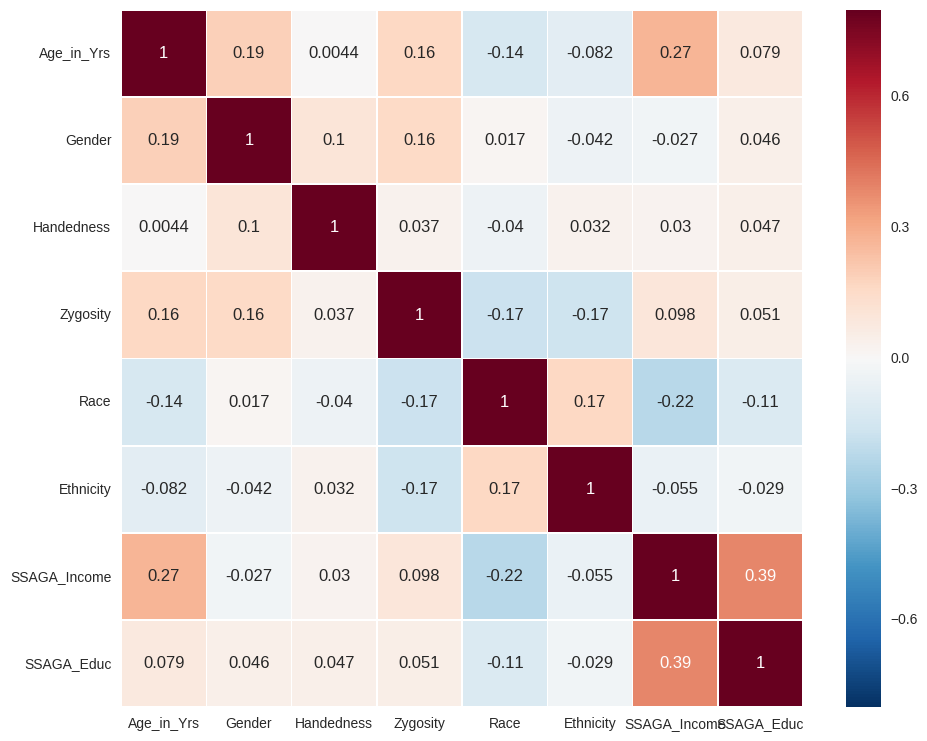

In [9]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data_demog.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8)

### The most correlated Demog data

- #### Income and Years of Education

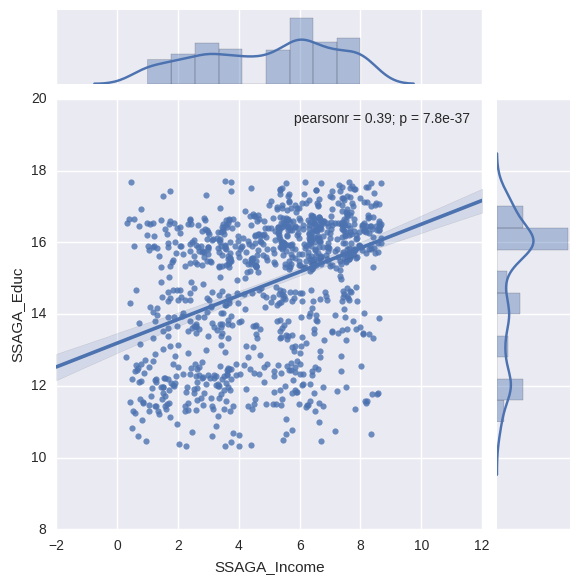

In [10]:
sns.set(color_codes=True)
sns.jointplot(x="SSAGA_Income", y="SSAGA_Educ", x_jitter=.7,y_jitter=.7,data=data_demog,kind="reg");

- ####  Income and Age

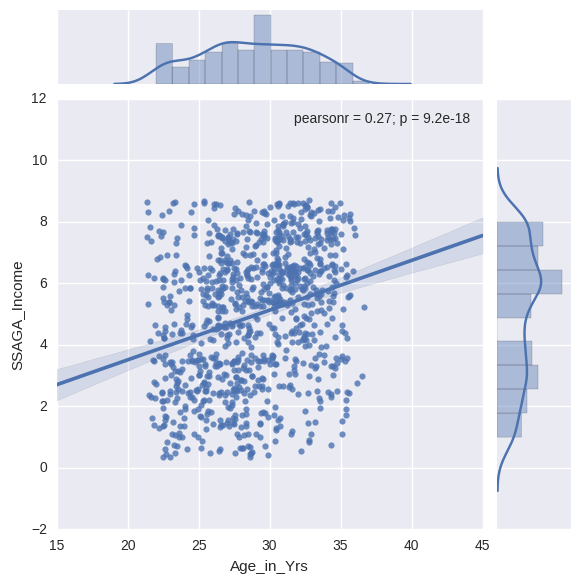

In [11]:
sns.set(color_codes=True)
sns.jointplot(x="Age_in_Yrs", y="SSAGA_Income", data=data_demog, x_jitter=.7,y_jitter=.7,kind='reg');

#### Gender differences 
- **Incomes**

Total household income: 
- <$10,000 = 1
- 10K-19,999 = 2
- 20K-29,999 = 3
- 30K-39,999 = 4
- 40K-49,999 = 5
- 50K-74,999 = 6
- 75K-99,999 = 7
- 100,000 and more = 8

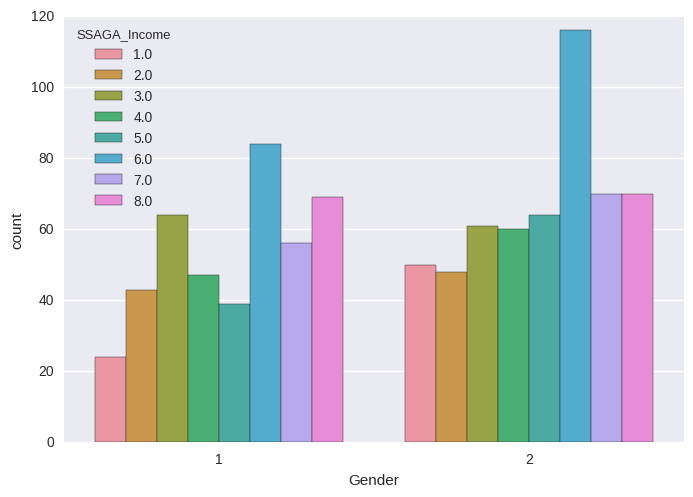

In [12]:
#'Male':1,'Female':2
sns.countplot(x='Gender',hue='SSAGA_Income',data=data_demog)

- **Education**

Years of education completed: <11 = 11; 12; 13; 14; 15; 16; 17+ = 17

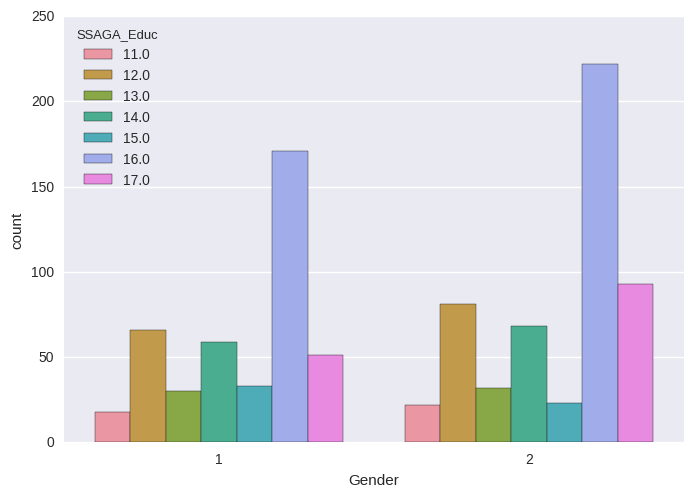

In [13]:
# Gender difference - Education

sns.countplot(x='Gender',hue='SSAGA_Educ',data=data_demog)

# Physiologic Domaine

BMI: Body Mass Index

BPSystolic: Blood Pressure - Systolic

BPDiastolic: Blood Pressure - Diastolic

PSQI_Score: Sleep (Pittsburgh Sleep Questionnaire) 

In [42]:
behav_physio = ["BMI","BPSystolic","BPDiastolic","PSQI_Score"]
data_physio = data.get(behav_physio)
data_physio.describe()

,BMI,BPSystolic,BPDiastolic,PSQI_Score
count,969.000000,951.000000,951.000000,970.000000
mean,27.180454,124.788644,77.345952,5.268041
std,5.887978,15.160632,11.033117,3.023183
min,16.480000,87.000000,28.000000,0.000000
25%,23.000000,114.500000,70.000000,3.000000
50%,25.930000,123.000000,77.000000,5.000000
75%,30.210000,134.000000,84.000000,7.000000
max,48.250000,247.000000,130.000000,19.000000


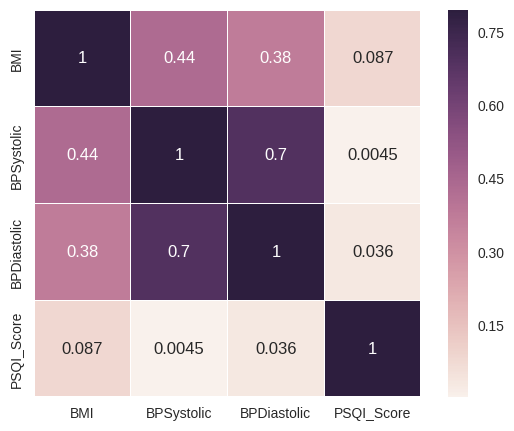

In [15]:
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(data_physio.corr(),linewidths=.5,annot=True,ax=ax,vmax=.8,square=True)

### The most correlated Physiodata

**- Systolic and Diastolic Blood Pressure**

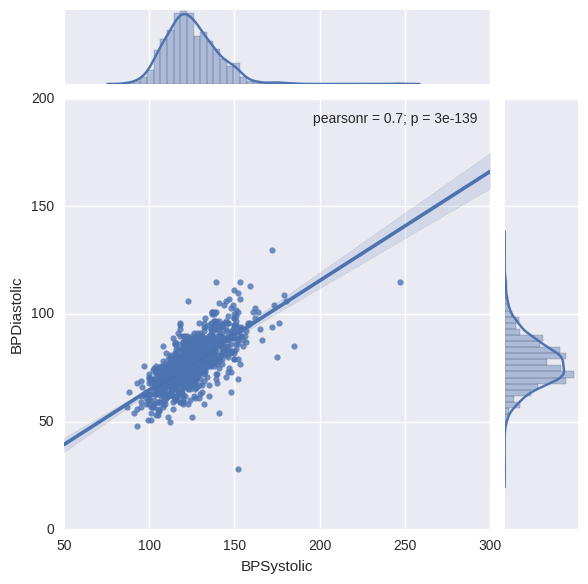

In [16]:
sns.set(color_codes=True)
sns.jointplot(x="BPSystolic", y="BPDiastolic",data=data_physio,kind="reg");

**- BMI and Systolic Blood Pressure**

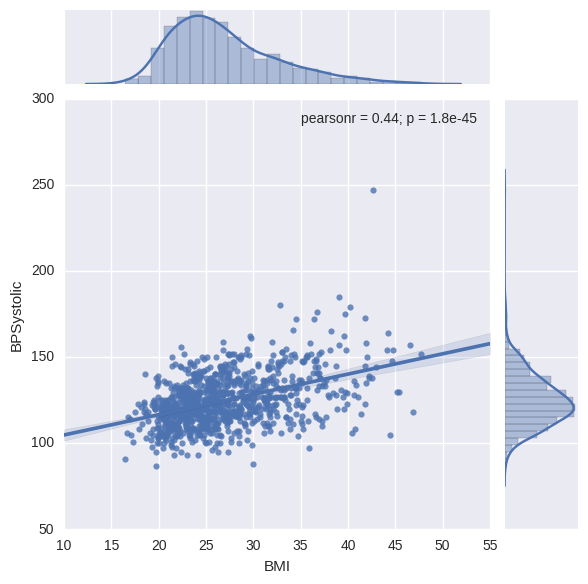

In [17]:
sns.set(color_codes=True)
sns.jointplot(x="BMI", y="BPSystolic",data=data_physio,kind="reg");

# Cognitive Domain

- ### Instrument: Episodic Memory (Picture Sequence Memory)


*The Picture Sequence Memory Test is a measure developed for the Open of episodic memory for ages 3-85 years. It involves recalling increasingly lengthy series of illustrated objects and activities that are presented in a particular order on the computer screen. The participants are asked to recall the sequence of pictures that is demonstrated over two learning trials; sequence length varies from 6-18 pictures, depending on age. Participants are given credit for each adjacent pair of pictures (i.e., if pictures in locations 7 and 8 and placed in that order and adjacent to each other anywhere - such as slots 1 and 2 - one point is awarded) they correctly place, up to the maximum value for the sequence, which is one less than the sequence length (if there are 18 pictures in the sequence, the maximum score is 17, because that is the number of adjacent pairs of pictures that exist). The test takes approximately 7 minutes to administer. This test is recommended for ages 3-85.*

In [44]:
behav_cog_EpMem = ["PicSeq_Unadj"]
data_cog_EpMem = data.get(behav_cog_EpMem)
data_cog_EpMem.describe()

,PicSeq_Unadj
count,969.000000
mean,111.278029
std,13.527188
min,76.420000
25%,102.180000
50%,109.960000
75%,120.320000
max,135.550000


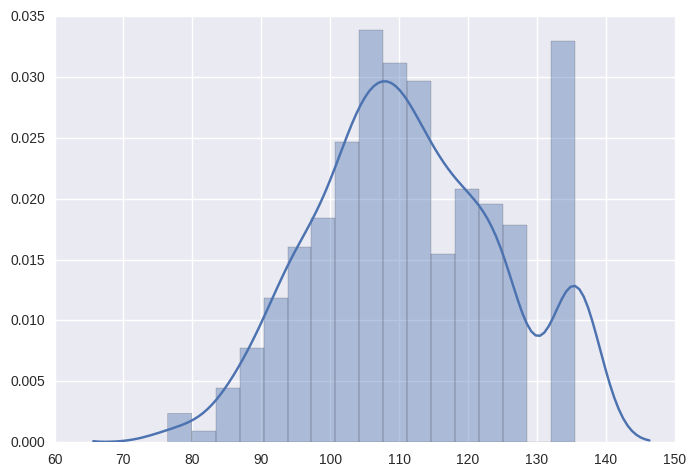

In [109]:
# Test for normality
x = data_cog_EpMem.PicSeq_Unadj.dropna()

shapiro_results = scipy.stats.shapiro(x)

matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['PicSeq_Unadj', len(x) - 1, shapiro_results[0], shapiro_results[1]]
]

shapiro_table = FF.create_table(matrix_sw, index=True)
iplot(shapiro_table, filename='shapiro-table')

# Plot distribution
sns.distplot(data_cog_EpMem.loc[~data_cog_EpMem.PicSeq_Unadj.isnull()].PicSeq_Unadj.as_matrix());

- ### Instrument: Executive Function

   - #### Cognitive Flexibility (Dimensional Change Card Sort)
   
   *DCCS is a measure of cognitive flexibility. Two target pictures are presented that vary along two dimensions (e.g., shape and color). Participants are asked to match a series of bivalent test pictures (e.g., yellow balls and blue trucks) to the target pictures, first according to one dimension (e.g., color) and then, after a number of trials, according to the other dimension (e.g., shape). "Switch" trials are also employed, in which the participant must change the dimension being matched. For example, after 4 straight trials matching on shape, the participant may be asked to match on color on the next trial and then go back to shape, thus requiring the cognitive flexibility to quickly choose the correct stimulus. Scoring is based on a combination of accuracy and reaction time, and the test takes approximately 4 minutes to administer. This test is recommended for ages 3-85.*
   
   - #### Inhibition (Flanker Task)
   *The Flanker task measures both a participant's attention and inhibitory control. The test requires the participant to focus on a given stimulus while inhibiting attention to stimuli (fish for ages 3-7 or arrows for ages 8-85) flanking it. Sometimes the middle stimulus is pointing in the same direction as the "flankers" (congruent) and sometimes in the opposite direction (incongruent). Scoring is based on a combination of accuracy and reaction time, and the test takes approximately 3 minutes to administer. This test is recommended for ages 3-85.*

In [61]:
behav_cog_ExFun = ["CardSort_Unadj","Flanker_Unadj"]
data_cog_ExFun = data.get(behav_cog_ExFun)
data_cog_ExFun.describe()

,CardSort_Unadj,Flanker_Unadj
count,967.000000,970.000000
mean,114.636298,112.063784
std,10.327818,9.995911
min,80.940000,84.900000
25%,107.710000,105.230000
50%,114.320000,111.890000
75%,121.300000,118.280000
max,143.940000,142.110000


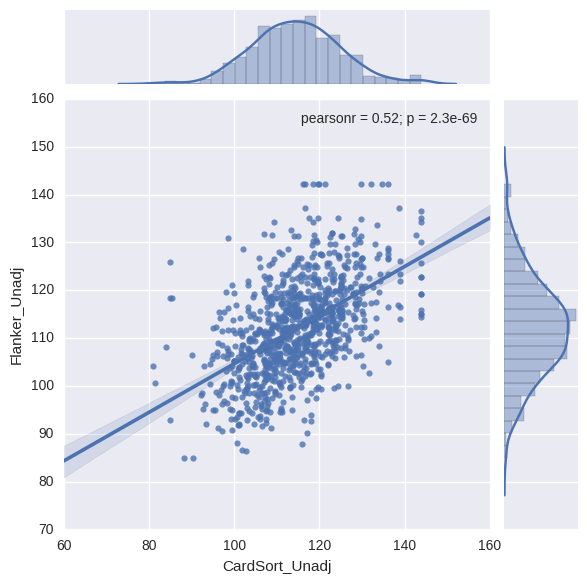

In [110]:
# Test for normality
x = data_cog_ExFun.CardSort_Unadj.dropna()
y = data_cog_ExFun.Flanker_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['CardSort_Unadj', len(x) - 1, shapiro_results_x[0], shapiro_results_x[1]],
    ['Flanker_Unadj', len(y) - 1, shapiro_results_y[0], shapiro_results_y[1]]
]

shapiro_table = FF.create_table(matrix_sw, index=True)
iplot(shapiro_table, filename='shapiro-table')
# plot  dist
sns.jointplot(x="CardSort_Unadj", y="Flanker_Unadj",data=data_cog_ExFun.dropna(),kind="reg");

- ### Instrument: Fluid Intelligence (Penn Progressive Matrices)

    *Fluid intelligence is measured using Raven’s Progressive Matrices (Prabhakaran et al. 1997; Christoff et al. 2001; Gray et al. 2003; Conway et al. 2005; Gray et al. 2005; Wendelken et al. 2008). We use Form A of an abbreviated version of the Raven’s developed by Gur and colleagues (Bilker et al. 2012). Participants are presented with patterns made up of 2x2, 3x3 or 1x5 arrangements of squares, with one of the squares missing. The participant must pick one of five response choices that best fits the missing square on the pattern. The task has 24 items and 3 bonus items, arranged in order of increasing difficulty. However, the task discontinues if the participant makes 5 incorrect responses in a row.
    *
    
    ```
    Number of Correct Responses (PMAT24_A_CR)
    Median Reaction Time for Correct Responses (PMAT24_A_RTCR)```

In [66]:
behav_cog_FluInt = ["PMAT24_A_CR","PMAT24_A_RTCR"]
data_cog_FluInt = data.get(behav_cog_FluInt)
data_cog_FluInt.describe()

,PMAT24_A_CR,PMAT24_A_RTCR
count,964.000000,964.000000
mean,16.428423,15239.259336
std,4.893472,9178.040837
min,4.000000,1989.000000
25%,13.000000,7338.750000
50%,18.000000,14254.500000
75%,20.000000,20787.000000
max,24.000000,61641.000000


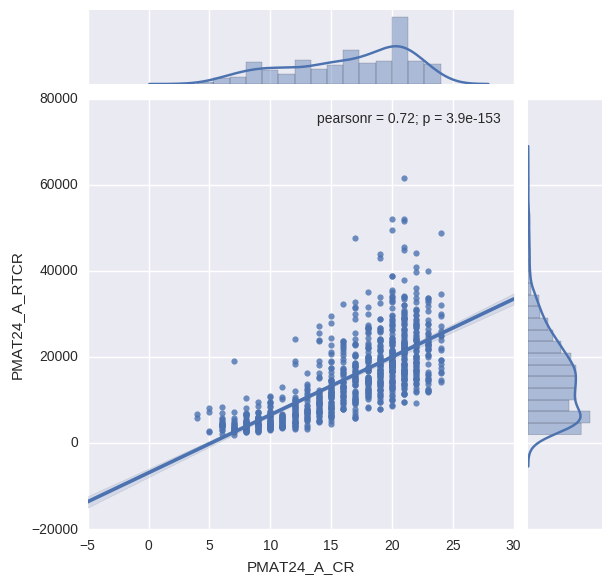

In [118]:
# Test for normality
x = data_cog_FluInt.PMAT24_A_CR.dropna()
y = data_cog_FluInt.PMAT24_A_RTCR.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['PMAT24_A_CR', len(x) - 1, shapiro_results_x[0], shapiro_results_x[1]],
    ['PMAT24_A_RTCR', len(y) - 1, shapiro_results_y[0], shapiro_results_y[1]]
]

shapiro_table = FF.create_table(matrix_sw, index=True)
iplot(shapiro_table, filename='shapiro-table')
# plot  dist
sns.jointplot(x="PMAT24_A_CR", y="PMAT24_A_RTCR",data=data_cog_FluInt.dropna(),kind="reg");

- ### Instrument: Language

  - #### Reading Decoding (Oral Reading Recognition)

    *Separate but parallel reading tests have been developed in English and in Spanish. In either language, the participant is asked to read and pronounce letters and words as accurately as possible. The test administrator scores them as right or wrong. For the youngest children, the initial items require them to identify letters (as opposed to symbols) and to identify a specific letter in an array of 4 symbols. The test is given via a computerized adaptive format and requires approximately 3 minutes. This test is recommended for ages 7-85, but is available for use as young as age 3, if requested.*
  
  - #### Vocabulary Comprehension (Picture Vocabulary)
   
   *This measure of receptive vocabulary is administered in a computerized adaptive format. The respondent is presented with an audio recording of a word and four photographic images on the computer screen and is asked to select the picture that most closely matches the meaning of the word. This test takes approximately 4 minutes to administer and is recommended for ages 3-85.*

In [99]:
behav_cog_Lang = ["ReadEng_Unadj","PicVocab_Unadj"]
data_cog_Lang= data.get(behav_cog_Lang)
data_cog_Lang.describe()

,ReadEng_Unadj,PicVocab_Unadj
count,970.000000,970.000000
mean,116.266997,116.232152
std,10.892207,9.813873
min,84.200000,90.690000
25%,109.092600,110.174075
50%,116.840000,116.598500
75%,124.007500,122.839850
max,150.710000,153.088900


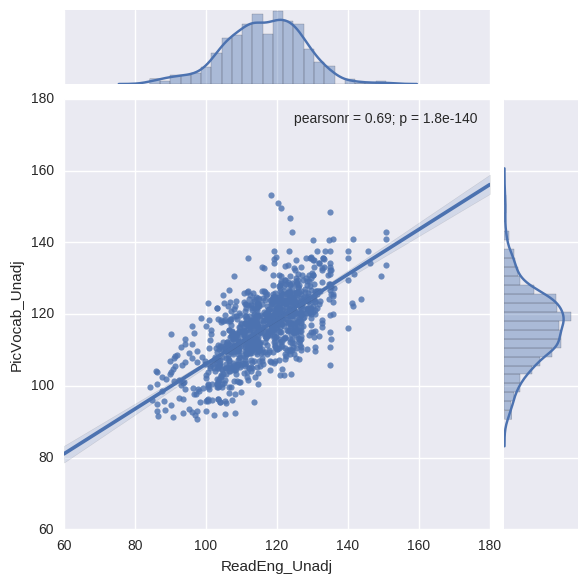

In [100]:
# Test for normality
x = data_cog_Lang.ReadEng_Unadj.dropna()
y = data_cog_Lang.PicVocab_Unadj.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['ReadEng_Unadj', len(x) - 1, shapiro_results_x[0], shapiro_results_x[1]],
    ['PicVocab_Unadj', len(y) - 1, shapiro_results_y[0], shapiro_results_y[1]]
]

shapiro_table = plotly.figure_factory.create_table(matrix_sw, index=True)
iplot(shapiro_table, filename='shapiro-table')

# Plot distribution
sns.jointplot(x="ReadEng_Unadj", y="PicVocab_Unadj",data=data_cog_Lang.dropna(),kind="reg");

- ### Instrument: Processing Speed (Pattern Completion Processing Speed)
    
    *This test measures speed of processing by asking participants to discern whether two side-by-side pictures are the same or not. Participants' raw score is the number of items correct in a 90-second period. The items are designed to be simple to most purely measure processing speed. The test overall takes approximately 3 minutes to administer. This test is recommended for ages 7-85, but is available for use as young as age 3, if requested.*

In [104]:
behav_cog_ProcSpee = ["ProcSpeed_Unadj"]
data_cog_ProcSpee= data.get(behav_cog_ProcSpee)
data_cog_ProcSpee.describe()

,ProcSpeed_Unadj
count,970.000000
mean,113.614021
std,14.776429
min,51.620000
25%,104.060000
50%,112.495000
75%,121.625000
max,154.690000


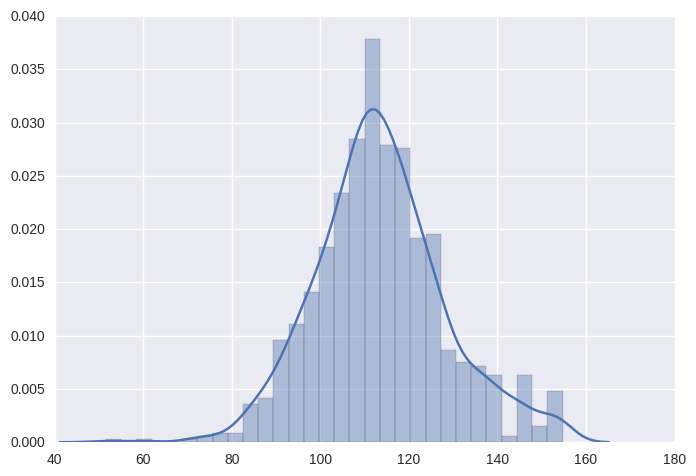

In [103]:
x = data_cog_ProcSpee.ProcSpeed_Unadj.dropna()

shapiro_results = scipy.stats.shapiro(x)

matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['ProcSpeed_Unadj', len(x) - 1, shapiro_results[0], shapiro_results[1]]
]

shapiro_table = plotly.figure_factory.create_table(matrix_sw, index=True)
iplot(shapiro_table, filename='shapiro-table')
# Plot distribution
sns.distplot(data_cog_ProcSpee.ProcSpeed_Unadj.as_matrix());

- ### Instrument: Self-regulation/Impulsivity (Delay Discounting)

    *Delay discounting describes the undervaluing of rewards that are delayed in time. It is illustrated by the fact that humans (and other animals) will often choose a smaller immediate reward over an objectively larger, but delayed reward. We use a version of the discounting task that identifies ‘indifference points’ at which a person is equally likely to choose a smaller reward (e.g., $100) sooner versus a larger reward later (e.g., $200 in 3 years). Based on the work of Green and Myerson (Estle et al. 2006; Green et al. 2007), we use an adjusting-amount approach, in which delays are fixed and reward amounts are adjusted on a trial-by-trial basis based on participants’ choices, to rapidly hone in on indifference points. This approach has been repeatedly validated to provide reliable estimates of delay discounting (Estle et al. 2006). As a summary measure, we use an area-under-the-curve discounting measure (AUC) that provides a valid and reliable index of how steeply an individual discounts delayed rewards (Myerson et al. 2001).
*

In [123]:
behav_cog_SelfReg = ["DDisc_AUC_200","DDisc_AUC_40K"]
data_cog_SelfReg= data.get(behav_cog_SelfReg)
data_cog_SelfReg.describe()

,DDisc_AUC_200,DDisc_AUC_40K
count,964.000000,964.000000
mean,0.248377,0.488202
std,0.202812,0.288475
min,0.015692,0.015625
25%,0.096942,0.238281
50%,0.188869,0.476628
75%,0.329884,0.744792
max,0.984442,0.984375


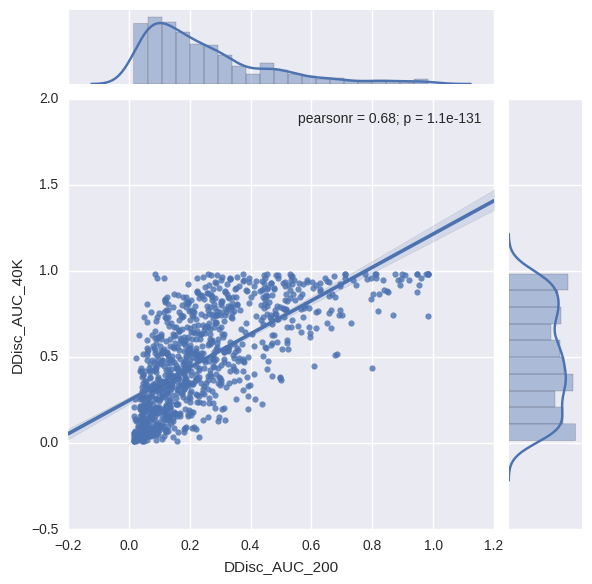

In [124]:
# Test for normality
x = data_cog_SelfReg.DDisc_AUC_200.dropna()
y = data_cog_SelfReg.DDisc_AUC_40K.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['DDisc_AUC_200', len(x) - 1, shapiro_results_x[0], shapiro_results_x[1]],
    ['DDisc_AUC_40K', len(y) - 1, shapiro_results_y[0], shapiro_results_y[1]]
]

shapiro_table = plotly.figure_factory.create_table(matrix_sw, index=True)
iplot(shapiro_table, filename='shapiro-table')
# Plot distribution
sns.jointplot(x="DDisc_AUC_200", y="DDisc_AUC_40K",data=data_cog_SelfReg.dropna(),kind="reg");

- ### Instrument: Spatial Orientation (Variable Short Penn Line Orientation Test)

     *Spatial orientation processing is measured using the Variable Short Penn Line Orientation Test (Gur et al. 2001a; Gur et al. 2010). Participants are shown two lines with different orientations. They have to rotate one of the lines (a moveable blue one) so that is parallel to the other line (a fixed red line). The rotation of the blue line is accomplished by clicking buttons on the keyboard that rotate the lines either clockwise or counterclockwise. Across trials, the lines vary in their relative location on the screen, though the distance between the centers of the two lines is always the same. The length of the red line is always the same, but the length of the blue line can be either short or long. There are a total of 24 trials*

In [126]:
behav_cog_SpacOri = ["VSPLOT_TC","VSPLOT_CRTE"]
data_cog_SpacOri= data.get(behav_cog_SpacOri)
data_cog_SpacOri.describe()

,VSPLOT_TC,VSPLOT_CRTE
count,963.000000,963.000000
mean,14.587747,1150.712112
std,4.520378,356.623313
min,1.000000,493.086360
25%,12.000000,913.830400
50%,15.000000,1101.909000
75%,18.000000,1322.119000
max,26.000000,3255.687500


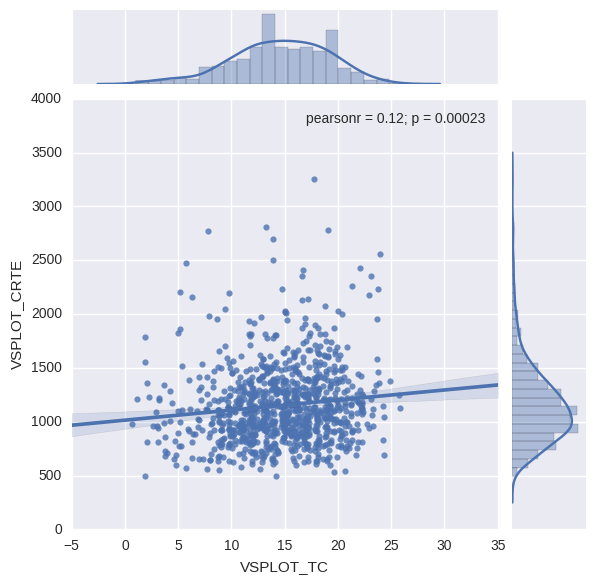

In [130]:
# Test for normality
x = data_cog_SpacOri.VSPLOT_TC.dropna()
y = data_cog_SpacOri.VSPLOT_CRTE.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)

matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['VSPLOT_TC', len(x) - 1, shapiro_results_x[0], shapiro_results_x[1]],
    ['VSPLOT_CRTE', len(y) - 1, shapiro_results_y[0], shapiro_results_y[1]]
]

shapiro_table = plotly.figure_factory.create_table(matrix_sw, index=True)
iplot(shapiro_table, filename='shapiro-table')
# Plot distribution
sns.jointplot(x="VSPLOT_TC", y="VSPLOT_CRTE",data=data_cog_SpacOri.dropna(),kind="reg",x_jitter=.4);

- ### Instrument: Sustained Attention (Short Penn Continuous Performance Test)
    
    *Continuous sustained attention is measured using the Short Penn Continuous Performance Test (Number/Letter Version) (Gur et al. 2001; Gur et al. 2001; Gur et al. 2010). Participants see vertical and horizontal red lines flash on the computer screen. In one block, they must press the spacebar when the lines form a number and in the other block they press the spacebar when the lines form a letter. The lines are displayed for 300 ms followed by a 700 ms ITI. Each block contains 90 stimuli and lasts for 1.5 minutes.*


```SCPT_TPRT:  Short Penn CPT Median Response Time for True Positive Responses
SCPT_SEN: Short Penn CPT Sensitivity = SCPT_TP/(SCPT_TP + SCPT_FN)
SCPT_SPEC: Short Penn CPT Specificity = SCPT_TN/(SCPT_TN + SCPT_FP)```

In [133]:
behav_cog_SusAtt = ["SCPT_TPRT","SCPT_SEN","SCPT_SPEC"]
data_cog_SusAtt= data.get(behav_cog_SusAtt)
data_cog_SusAtt.describe()

,SCPT_TPRT,SCPT_SEN,SCPT_SPEC
count,962.000000,964.000000,964.000000
mean,472.976611,0.953126,0.953622
std,42.751249,0.071077,0.036560
min,360.000000,0.000000,0.766700
25%,442.250000,0.933300,0.933300
50%,470.000000,0.966700,0.958300
75%,500.000000,0.983300,0.983300
max,650.000000,1.000000,1.000000


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:531: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



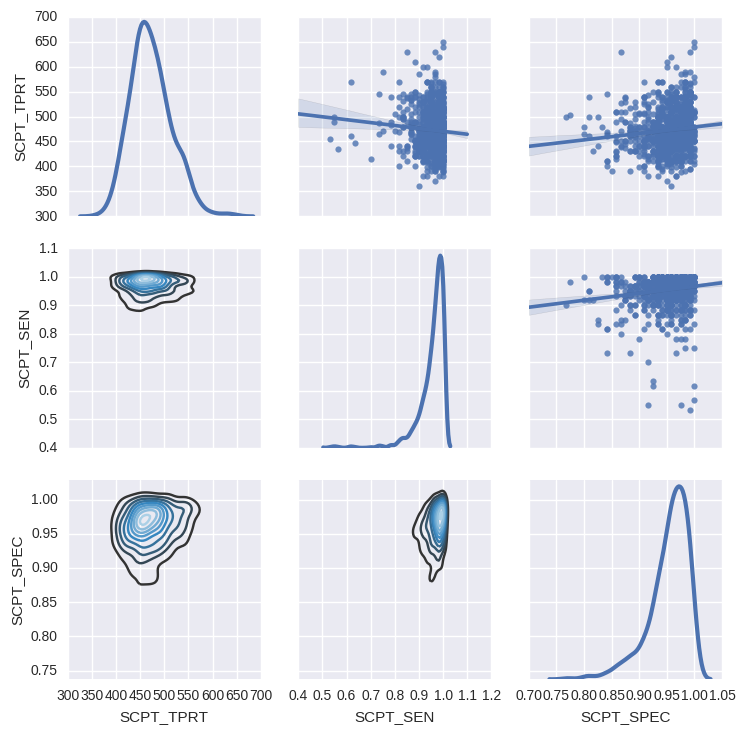

In [138]:
# Test for normality
x = data_cog_SusAtt.SCPT_TPRT.dropna()
y = data_cog_SusAtt.SCPT_SEN.dropna()
z = data_cog_SusAtt.SCPT_SPEC.dropna()

shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(y)

matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['SCPT_TPRT', len(x) - 1, shapiro_results_x[0], shapiro_results_x[1]],
    ['SCPT_SEN', len(y) - 1, shapiro_results_y[0], shapiro_results_y[1]],
    ['SCPT_SPEC', len(y) - 1, shapiro_results_z[0], shapiro_results_z[1]]
]

shapiro_table = plotly.figure_factory.create_table(matrix_sw, index=True)
iplot(shapiro_table, filename='shapiro-table')

# PLot dist
g = sns.PairGrid(data_cog_SusAtt.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

- ### Instrument: Verbal Episodic Memory (Penn Word Memory Test)

    *Verbal episodic memory is measured using Form A of the Penn Word Memory Test (Gur et al. 2001a; Gur et al. 2010). Participants are shown 20 words and asked to remember them for a subsequent memory test. They are then shown 40 words (the 20 previously presented words and 20 new words matched on memory related characteristics). They decide whether they have seen the word previously by choosing among “definitely yes,” “probably yes,” “probably no,” and “definitely no.”*

 
```
IWRD_TOT: Total Number of Correct Responses
IWRD_RTC: Median Reaction Time for Correct Responses
```

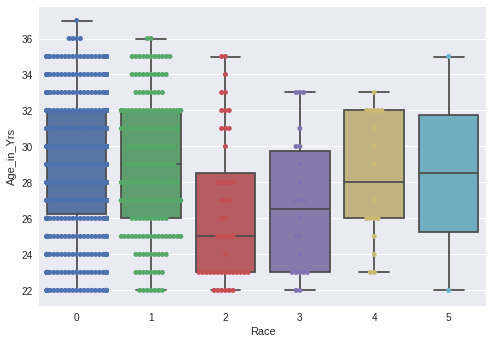

In [60]:
f = plt.figure()
ax = f.add_subplot(111)
sns.swarmplot(x='Race', y="Age_in_Yrs", data=data_demog, ax=ax)
sns.boxplot(x='Race', y="Age_in_Yrs", data=data_demog, ax=ax)

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


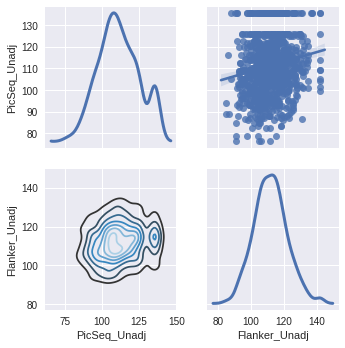

In [24]:
g = sns.PairGrid(data_cog_ExFun.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)